# Have a look of Image and Label

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import os

In [2]:
root_train_imgs = "../__HW7_DATA/rgb_images/"
root_test_imgs = "../__HW7_DATA/rgb_images(test_set)/"
root_train_mask = "../__HW7_DATA/semantic_annotations/gtLabels/"

First 5 train imgs are ['00000_FV.png', '00001_FV.png', '00002_FV.png', '00003_FV.png', '00004_FV.png']
(192, 256, 3)


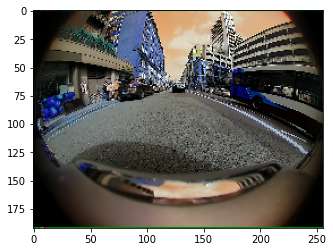

First 5 train mask are ['00000_FV.png', '00001_FV.png', '00002_FV.png', '00003_FV.png', '00004_FV.png']
(192, 256, 3)


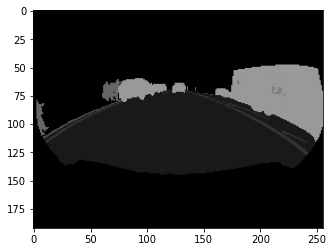

In [3]:
img_num = 2

train_imgs = os.listdir(root_train_imgs)
print(f"First 5 train imgs are {train_imgs[:5]}")
img = cv.imread(root_train_imgs + train_imgs[img_num])
img_resize = cv.resize(img, (256, 192), interpolation = cv.INTER_CUBIC)
print(img_resize.shape)
plt.imshow(img_resize)
plt.show()

train_mask = os.listdir(root_train_mask)
print(f"First 5 train mask are {train_mask[:5]}")
mask = cv.imread(root_train_mask + train_mask[img_num])
mask_resize = cv.resize(mask, (256, 192), interpolation = cv.INTER_NEAREST)
print(mask_resize.shape)
mask_resize_draw = mask_resize/10
plt.imshow(mask_resize_draw)
plt.show()

In [4]:
np.unique(mask_resize)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

# Build Custom Dataset Class

In [5]:
import cv2 as cv
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
from keras.utils import to_categorical

class RoadDataset(Dataset):
    
    def __init__(self, width, height, path_to_imgs, path_to_mask, transform = None):
        
        self.height = height
        self.width = width
        self.path_to_img = path_to_imgs
        self.path_to_mask= path_to_mask
        
        self.train_imgs = os.listdir(path_to_imgs)
        self.train_mask = os.listdir(path_to_mask)
        
        self.length = len(self.train_imgs)
        self.transform = transform
        
    def __getitem__(self, index):
        
        img = cv.imread(self.path_to_img + self.train_imgs[index])
        msk = cv.imread(self.path_to_mask + self.train_mask[index])
        
        # default is use nearset neighbor
        img_resize = cv.resize(img, (self.width, self.height), interpolation = cv.INTER_CUBIC)
        msk_resize = cv.resize(msk, (self.width, self.height), interpolation = cv.INTER_NEAREST)
        
        msk_transpose = msk_resize.transpose((2, 0, 1))
        msk_1st_channel = msk_transpose[0]
        
        #msk_transpose = msk_resize.transpose((1, 2, 0))
        if self.transform:
            img_tensor = self.transform(img_resize)
        
        return (img_tensor, msk_1st_channel)
        
        
    def __len__(self):
        return self.length
    
trans = transforms.Compose([
    transforms.ToTensor(),
])

width = 256
height = 192

Train_Dataset = RoadDataset(width, height, root_train_imgs, root_train_mask, trans)

batch_size = 3

Train_Dataloader = DataLoader(Train_Dataset, batch_size = batch_size, shuffle = True, num_workers = 0)

In [6]:
inputs, masks = next(iter(Train_Dataloader))
print(inputs.shape, masks.shape)


mask_np = masks.numpy()
print(np.unique(mask_np[2]))
print(mask_np[2,40:70,40:70])

torch.Size([3, 3, 192, 256]) torch.Size([3, 192, 256])
[0 1 2 3 4 5 6 7 8 9]
[[6 6 6 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [6 6 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [6 6 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [6 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# See Model Summary

In [7]:
from torchsummary import summary
import torch
import torch.nn as nn
import pytorch_unet

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = pytorch_unet.UNet(10)
#model = model.to(device)

#summary(model, input_size = (3, 192, 192))

# Train UNet

In [8]:
from collections import defaultdict
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        since = time.time()

        for param_group in optimizer.param_groups:
            print("LR", param_group['lr'])
                    
            model.train()

        metrics = defaultdict(float)
        epoch_samples = 0
            
        for inputs, labels in tqdm(Train_Dataloader):
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.long()
            

            optimizer.zero_grad()

            outputs = model(inputs)
            
            if True:
                pred_np = outputs.data.cpu().numpy()[0]
                pred_argmax = np.argmax(pred_np, axis = 0)
                print(np.unique(pred_argmax))
                plt.imshow(pred_argmax/10)
                plt.show()
            
            loss = criterion(outputs, labels)
            #loss = calc_loss(outputs, labels, metrics)

            loss.backward()
            
            optimizer.step()

            epoch_samples += inputs.size(0)
            
        scheduler.step()  
        print_metrics(metrics, epoch_samples, "train")
        epoch_loss = metrics['loss'] / epoch_samples

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

cuda:0


  0%|                                                                                         | 0/2745 [00:00<?, ?it/s]

Epoch 0/29
----------
LR 0.0001
[8]


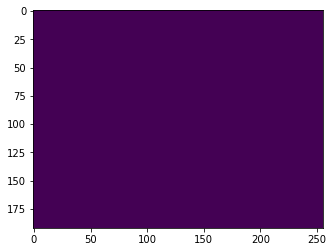

  0%|                                                                               | 1/2745 [00:02<1:32:28,  2.02s/it]

[8]


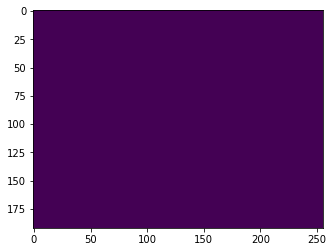

  0%|                                                                               | 2/2745 [00:03<1:15:42,  1.66s/it]

[8]


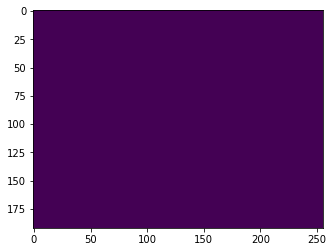

  0%|                                                                               | 3/2745 [00:04<1:01:14,  1.34s/it]

[8]


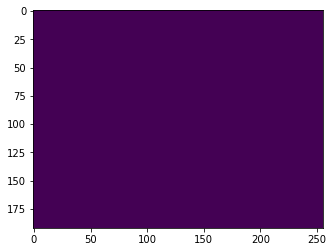

  0%|                                                                                 | 4/2745 [00:05<55:58,  1.23s/it]

[8]


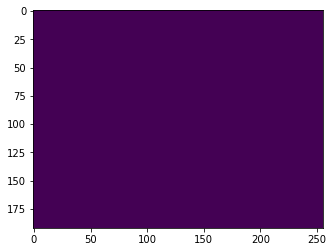

  0%|▏                                                                                | 5/2745 [00:06<53:10,  1.16s/it]

[0 8]


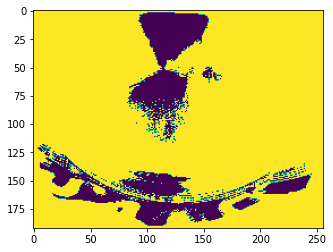

  0%|▏                                                                                | 6/2745 [00:07<51:40,  1.13s/it]

[0 8]


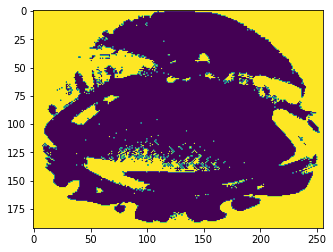

  0%|▏                                                                                | 7/2745 [00:08<50:51,  1.11s/it]

[0 8]


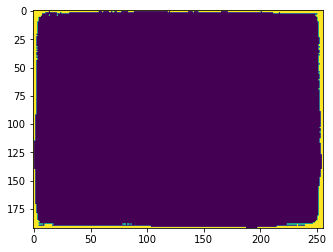

  0%|▏                                                                                | 8/2745 [00:09<50:01,  1.10s/it]

[0 8]


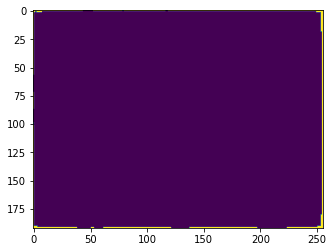

  0%|▎                                                                                | 9/2745 [00:10<50:29,  1.11s/it]

[0 8]


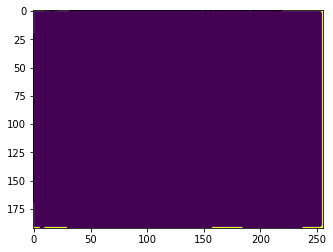

  0%|▎                                                                               | 10/2745 [00:11<49:56,  1.10s/it]

[0 8]


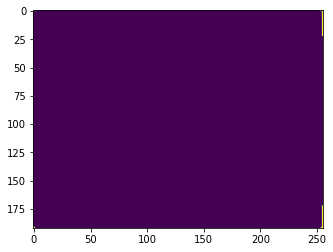

  0%|▎                                                                               | 11/2745 [00:13<51:39,  1.13s/it]

[0 8]


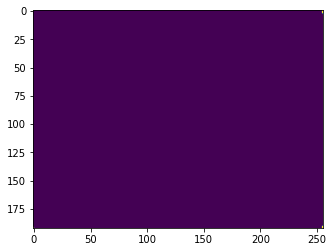

  0%|▎                                                                               | 12/2745 [00:14<52:28,  1.15s/it]

[0 8]


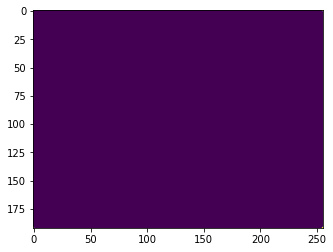

  0%|▍                                                                               | 13/2745 [00:15<51:56,  1.14s/it]

[0 8]


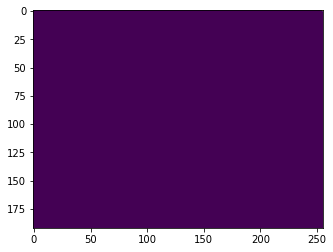

  1%|▍                                                                               | 14/2745 [00:16<52:55,  1.16s/it]

[0]


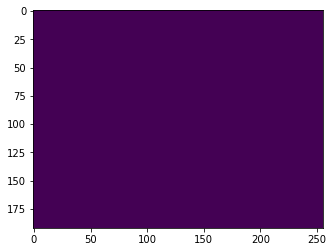

  1%|▍                                                                               | 15/2745 [00:17<52:04,  1.14s/it]

[0]


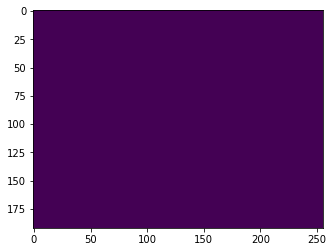

  1%|▍                                                                               | 16/2745 [00:18<50:54,  1.12s/it]

[0]


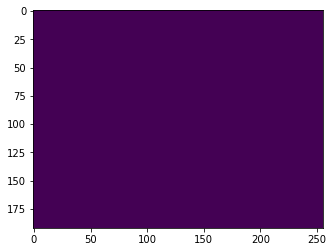

  1%|▍                                                                               | 17/2745 [00:19<50:43,  1.12s/it]

[0]


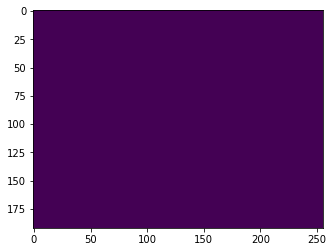

  1%|▌                                                                               | 18/2745 [00:20<50:05,  1.10s/it]

[0 1]


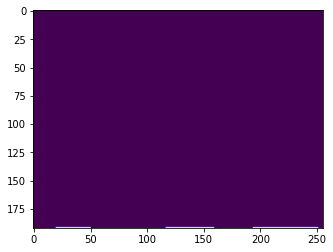

  1%|▌                                                                               | 19/2745 [00:22<49:39,  1.09s/it]

[0 1]


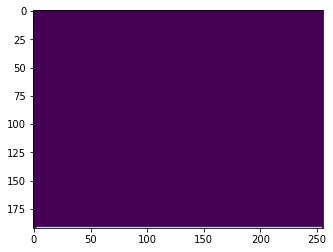

  1%|▌                                                                               | 20/2745 [00:23<49:03,  1.08s/it]

[0 1]


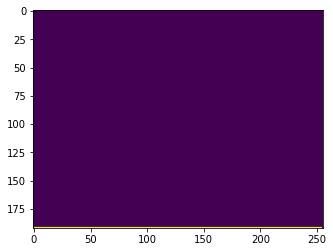

  1%|▌                                                                               | 21/2745 [00:24<49:09,  1.08s/it]

[0 1]


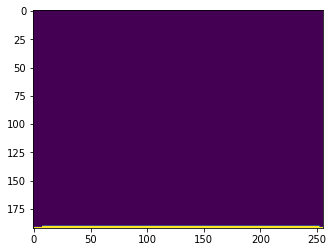

  1%|▋                                                                               | 22/2745 [00:25<48:56,  1.08s/it]

[0 1]


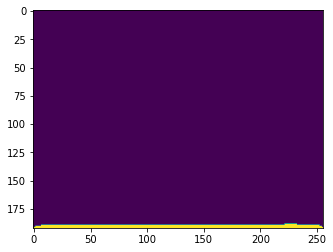

  1%|▋                                                                               | 23/2745 [00:26<49:07,  1.08s/it]

[0 1]


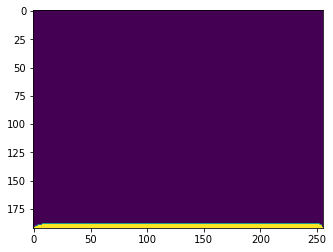

  1%|▋                                                                               | 24/2745 [00:27<51:11,  1.13s/it]

[0 1]


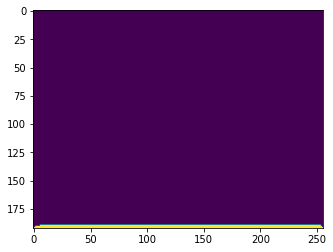

  1%|▋                                                                               | 25/2745 [00:28<50:14,  1.11s/it]

[0 1]


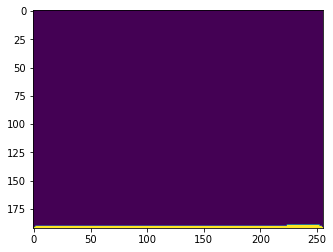

  1%|▊                                                                               | 26/2745 [00:29<49:34,  1.09s/it]

[0 1]


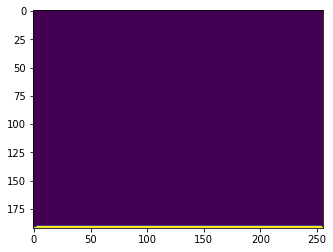

  1%|▊                                                                               | 27/2745 [00:30<50:00,  1.10s/it]

[0 1]


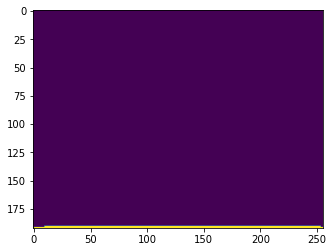

  1%|▊                                                                               | 28/2745 [00:31<49:24,  1.09s/it]

[0 1]


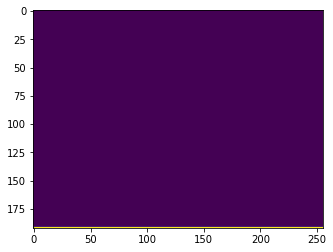

  1%|▊                                                                               | 29/2745 [00:32<49:09,  1.09s/it]

[0 1]


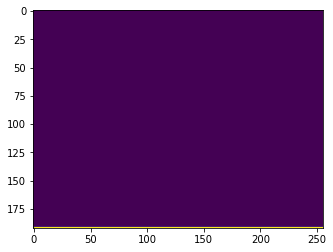

  1%|▊                                                                               | 30/2745 [00:34<49:00,  1.08s/it]

[0 1]


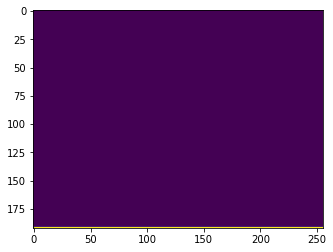

  1%|▉                                                                               | 31/2745 [00:35<49:22,  1.09s/it]

[0 1]


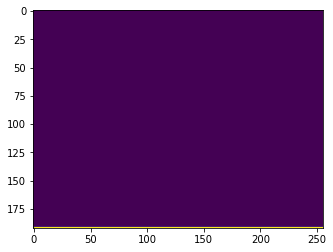

  1%|▉                                                                               | 32/2745 [00:36<48:54,  1.08s/it]

[0 1]


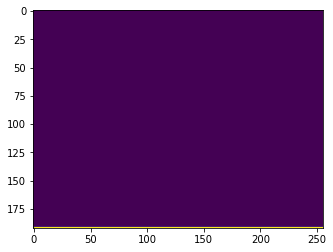

  1%|▉                                                                               | 33/2745 [00:37<49:10,  1.09s/it]

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 10

model = pytorch_unet.UNet(num_class).to(device)

optimizer_ft = optim.Adam(model.parameters(), lr = 1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 25, gamma = 0.1)

model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs = 30)

# Test UNet

In [ ]:
root_train_imgs = "../__HW7_DATA/rgb_images/"
root_test_imgs = "../__HW7_DATA/rgb_images(test_set)/"
root_train_mask = "../__HW7_DATA/semantic_annotations/gtLabels/"

Test_Dataset = RoadDataset(width, height, root_test_imgs, root_train_mask, trans)
Test_Dataloader = DataLoader(Test_Dataset, batch_size = 1, shuffle = False, num_workers = 0)

In [ ]:
img, _ = next(iter(Test_Dataloader))
img = img.to(device)
pred = model(img)
print(pred.shape)